In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense,Dropout
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Flatten

# This exact code works for both DataSets
## - fashion mnist
## - mnist original

### In order to switch between the two sets simply change everywhere the name "mnist" into "fashion" in every single variable and run.

# Fashion Mnist Dataset And Original Mnist Dataset

In [2]:
from sklearn.model_selection import train_test_split

fashion_labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

mnist_labels = {0 : "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9"}

IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10

def prep_data(raw):
    y = raw[:, 0]
    out_y = keras.utils.to_categorical(y, NUM_CLASSES)
    
    x = raw[:,1:]
    num_images = raw.shape[0]
    out_x = x.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    out_x = out_x / 255
    return out_x, out_y

# fashion mnist


In [4]:
fashion_data_train = pd.read_csv(r'Data\fashion-mnist.csv').values
fashion_data_test = pd.read_csv(r'Data\fashion-mnist_test.csv').values
# fashion_data = np.concatenate((fashion_data_1,fashion_data_2),axis=0)

fashion_df_train = pd.read_csv(r'Data\fashion-mnist.csv')
fashion_df_test = pd.read_csv(r'Data\fashion-mnist_test.csv')
fashion_df = pd.concat([fashion_df_train,fashion_df_test])

X_fashion, y_fashion = prep_data(fashion_data_train)
X_fashion_test, y_fashion_test = prep_data(fashion_data_test)

# original mnist

In [6]:
mnist_data_train = pd.read_csv(r'Data\mnist_train.csv').values
mnist_data_test = pd.read_csv(r'Data\mnist_test.csv').values
# mnist_data = np.concatenate((mnist_data_1,mnist_data_2),axis=0)

mnist_df_train = pd.read_csv(r'Data\mnist_train.csv')
mnist_df_test = pd.read_csv(r'Data\mnist_test.csv')
mnist_df = pd.concat([mnist_df_train,mnist_df_test])

X_mnist, y_mnist = prep_data(mnist_data_train)
X_mnist_test, y_mnist_test = prep_data(mnist_data_test)

In [7]:
def sample_images_data(data, names):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in names.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(4)
        # Append the samples to the samples list
        for j, _ in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(IMG_ROWS,IMG_COLS)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(fashion_df, fashion_labels)

Total number of sample images to plot:  40


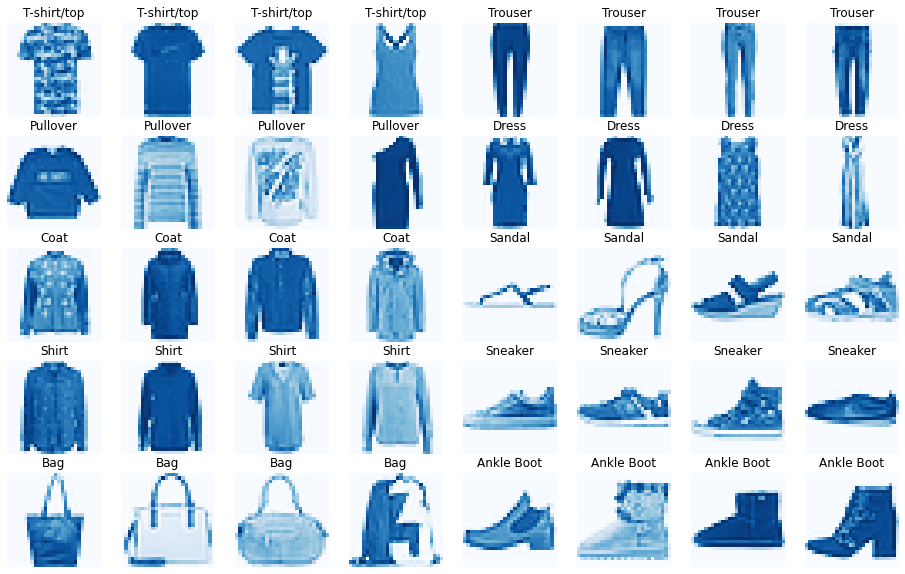

In [8]:
def plot_sample_images(data_sample_images, data_sample_labels, names, cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))
    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(names[data_sample_labels[i]])
    plt.show()    
    
plot_sample_images(train_sample_images,train_sample_labels,names=fashion_labels)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_fashion, y_fashion, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [10]:
model=Sequential()

model.add(Conv2D(32,kernel_size=3,activation="linear", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64, kernel_size=3,activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(128, kernel_size=3,activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam',metrics='accuracy')


In [11]:
model.summary()
X_train.shape, y_train.shape

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

((48000, 28, 28, 1), (48000, 10))

In [12]:
history = model.fit(X_train,y_train,epochs=20,batch_size=64, validation_data=(X_test,y_test))

Epoch 1/20
750/750 [==============================] - 18s 23ms/step - loss: 0.6462 - accuracy: 0.7653 - val_loss: 0.4812 - val_accuracy: 0.8241
Epoch 2/20
750/750 [==============================] - 17s 23ms/step - loss: 0.4443 - accuracy: 0.8385 - val_loss: 0.4095 - val_accuracy: 0.8438
Epoch 3/20
750/750 [==============================] - 20s 27ms/step - loss: 0.3888 - accuracy: 0.8567 - val_loss: 0.3904 - val_accuracy: 0.8559
Epoch 4/20
750/750 [==============================] - 20s 27ms/step - loss: 0.3493 - accuracy: 0.8715 - val_loss: 0.3514 - val_accuracy: 0.8702
Epoch 5/20
750/750 [==============================] - 17s 22ms/step - loss: 0.3237 - accuracy: 0.8816 - val_loss: 0.3325 - val_accuracy: 0.8773
Epoch 6/20
750/750 [==============================] - 17s 22ms/step - loss: 0.2955 - accuracy: 0.8904 - val_loss: 0.3494 - val_accuracy: 0.8717
Epoch 7/20
750/750 [==============================] - 17s 23ms/step - loss: 0.2784 - accuracy: 0.8974 - val_loss: 0.3225 - val_accuracy:

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [14]:
score = model.evaluate(X_fashion_test, y_fashion_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.38573315739631653
Test accuracy: 0.8970999717712402


In [15]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
ep = np.linspace(1,20,20,dtype='int')

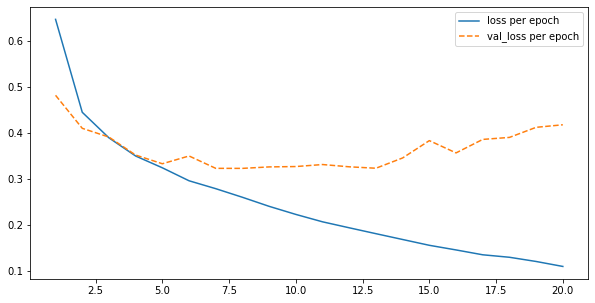

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(ep,loss,ls='-')
plt.plot(ep,val_loss,ls='--')
plt.legend(['loss per epoch', 'val_loss per epoch'])

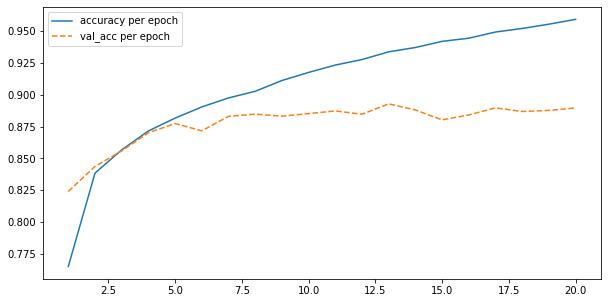

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(ep,acc,ls='-')
plt.plot(ep,val_acc,ls='--')
plt.legend(['accuracy per epoch', 'val_acc per epoch'])

In [18]:
#get the predictions for the test data
y_pred = model.predict(X_fashion_test)
y_pred = y_pred.argmax(axis=-1)

#get the indices to be plotted
y_test_pred = y_fashion_test.argmax(axis=-1)
y_true = y_test_pred

In [19]:
correct = np.nonzero(y_pred==y_true)[0]
incorrect = np.nonzero(y_pred!=y_true)[0]

In [20]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 8971
Incorrect predicted classes: 1029


In [21]:
len(y_true),len(y_pred)

(10000, 10000)

In [22]:
from sklearn.metrics import classification_report

target_names = [f"Class {i} ({fashion_labels[i]}) :"  for i in range(NUM_CLASSES)]
print(classification_report(y_true, y_pred, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.81      0.89      0.85      1000
    Class 1 (Trouser) :       0.99      0.98      0.99      1000
   Class 2 (Pullover) :       0.88      0.79      0.83      1000
      Class 3 (Dress) :       0.91      0.91      0.91      1000
       Class 4 (Coat) :       0.84      0.85      0.84      1000
     Class 5 (Sandal) :       0.98      0.96      0.97      1000
      Class 6 (Shirt) :       0.71      0.73      0.72      1000
    Class 7 (Sneaker) :       0.91      0.97      0.94      1000
        Class 8 (Bag) :       0.98      0.96      0.97      1000
 Class 9 (Ankle Boot) :       0.98      0.92      0.95      1000

               accuracy                           0.90     10000
              macro avg       0.90      0.90      0.90     10000
           weighted avg       0.90      0.90      0.90     10000



# retraining to avoid overfitting

In [23]:
model_2=Sequential()

model_2.add(Conv2D(32,kernel_size=3,activation="linear", input_shape=(28,28,1)))
model_2.add(MaxPooling2D(pool_size=2))
model_2.add(Dropout(0.25))
model_2.add(Conv2D(64, kernel_size=3,activation="relu"))
model_2.add(MaxPooling2D(pool_size=2))
model_2.add(Dropout(0.25))
model_2.add(Conv2D(128, kernel_size=3,activation="relu"))
model_2.add(MaxPooling2D(pool_size=2))
model_2.add(Dropout(0.4))
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='softmax'))

model_2.compile(loss='categorical_crossentropy', optimizer='adam',metrics='accuracy')


In [24]:
history_2 = model_2.fit(X_train,y_train,epochs=20,batch_size=64, validation_data=(X_test,y_test))

Epoch 1/20
750/750 [==============================] - 22s 29ms/step - loss: 0.8824 - accuracy: 0.6761 - val_loss: 0.5486 - val_accuracy: 0.7924
Epoch 2/20
750/750 [==============================] - 21s 28ms/step - loss: 0.6131 - accuracy: 0.7770 - val_loss: 0.4896 - val_accuracy: 0.8250
Epoch 3/20
750/750 [==============================] - 19s 25ms/step - loss: 0.5478 - accuracy: 0.8037 - val_loss: 0.4278 - val_accuracy: 0.8412
Epoch 4/20
750/750 [==============================] - 19s 25ms/step - loss: 0.5035 - accuracy: 0.8164 - val_loss: 0.4189 - val_accuracy: 0.8424
Epoch 5/20
750/750 [==============================] - 19s 25ms/step - loss: 0.4796 - accuracy: 0.8280 - val_loss: 0.3797 - val_accuracy: 0.8569
Epoch 6/20
750/750 [==============================] - 19s 25ms/step - loss: 0.4576 - accuracy: 0.8328 - val_loss: 0.3705 - val_accuracy: 0.8602
Epoch 7/20
750/750 [==============================] - 19s 25ms/step - loss: 0.4383 - accuracy: 0.8396 - val_loss: 0.3584 - val_accuracy:

In [25]:
score = model_2.evaluate(X_fashion_test, y_fashion_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2896815538406372
Test accuracy: 0.8916000127792358


In [26]:
acc = history_2.history['accuracy']
loss = history_2.history['loss']
val_acc = history_2.history['val_accuracy']
val_loss = history_2.history['val_loss']
ep = np.linspace(1,20,20,dtype='int')

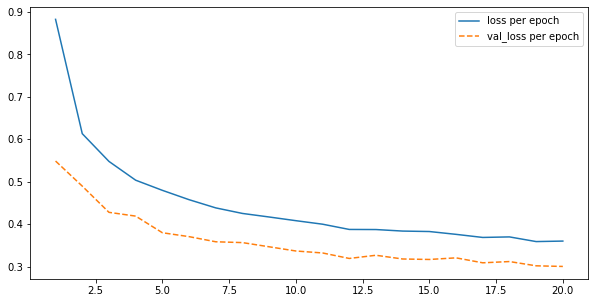

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(ep,loss,ls='-')
plt.plot(ep,val_loss,ls='--')
plt.legend(['loss per epoch','val_loss per epoch'])

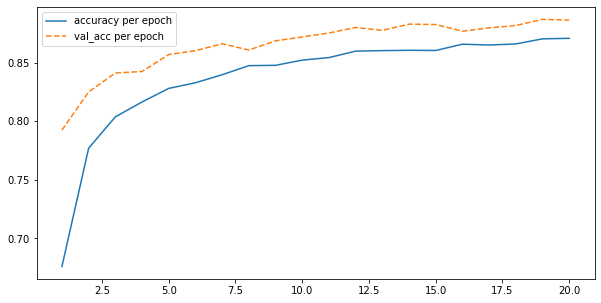

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(ep,acc,ls='-')
plt.plot(ep,val_acc,ls='--')
plt.legend(['accuracy per epoch', 'val_acc per epoch'])

In [29]:
#get the predictions for the test data
y_pred_2 = model_2.predict(X_fashion_test)
y_pred_2 = y_pred_2.argmax(axis=-1)

#get the indices to be plotted
y_test_pred = y_fashion_test.argmax(axis=-1)
y_true = y_test_pred

In [30]:
correct = np.nonzero(y_pred_2==y_true)[0]
incorrect = np.nonzero(y_pred_2!=y_true)[0]

In [31]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 8916
Incorrect predicted classes: 1084


In [32]:
len(y_true),len(y_pred)

(10000, 10000)

In [33]:
from sklearn.metrics import classification_report

target_names = [f"Class {i} ({fashion_labels[i]}) :" for i in range(NUM_CLASSES)]
print(classification_report(y_true, y_pred, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.81      0.89      0.85      1000
    Class 1 (Trouser) :       0.99      0.98      0.99      1000
   Class 2 (Pullover) :       0.88      0.79      0.83      1000
      Class 3 (Dress) :       0.91      0.91      0.91      1000
       Class 4 (Coat) :       0.84      0.85      0.84      1000
     Class 5 (Sandal) :       0.98      0.96      0.97      1000
      Class 6 (Shirt) :       0.71      0.73      0.72      1000
    Class 7 (Sneaker) :       0.91      0.97      0.94      1000
        Class 8 (Bag) :       0.98      0.96      0.97      1000
 Class 9 (Ankle Boot) :       0.98      0.92      0.95      1000

               accuracy                           0.90     10000
              macro avg       0.90      0.90      0.90     10000
           weighted avg       0.90      0.90      0.90     10000

